In [38]:
import pandas as pd
from random import sample
import time
import numpy as np
import matplotlib.pyplot as plt

In [39]:
retail = pd.read_csv('http://fimi.uantwerpen.be/data/retail.dat')
records = retail.values.tolist()
for i in range(len(records)):
    records[i] = records[i][0].split()

### Random samples

In [40]:
percentages = [0.2,0.4,0.6,0.8,1]
thresholds = [0.01, 0.02, 0.05]
samples = []
durations = []

# Loop through percentages and make random samples 
for percentage in percentages:
    samples.append(records[0:int(len(records)*percentage)])

### Apriori algorithm using random samples 

In [41]:
c = 0
# For loop to iterate trhough samples list
for s in samples:  
    print(f'RUNNING {percentages[c]*100}% OF DATASET')
    # For loop to iterate through thresholds list
    for x in thresholds:
        items = {}
        arr = []
        chunk = sample(s,int(0.1*len(s)))
        threshold = len(chunk)*x
        start = time.time()

        for i in range(len(chunk)):
            for j in range(len(chunk[i])):
                if chunk[i][j] not in items:
                    items[chunk[i][j]] = 0 
                items[chunk[i][j]] += 1

        C1 = pd.DataFrame({
                'Itemset': items.keys(),
                'Support': items.values()
            }) 
        L1 = C1.loc[(C1['Support']) >= threshold]

        for i in L1['Itemset']:
            for j in L1['Itemset']:
                if i == j:
                    pass
                else:
                    for k in s:
                        if i in k and j in k and [i,j,0] not in arr and [j,i,0] not in arr:
                            arr.append([i,j,0])

        for i in range(len(arr)):
            for j in chunk:
                if arr[i][0] in j and arr[i][1] in j:
                    arr[i][2] += 1

        C2 = pd.DataFrame(arr, columns=['Item 1','Item 2','Count'])
        L2 = C2.loc[(C2['Count']) >= threshold]
        end2 = time.time()
        pass_2_time = end2-start
        print(f'\tFINISHED RUNNING THRESHOLD {x} \t{pass_2_time}s')

        end = time.time()
        duration = end-start 
        durations.append(duration)
    print(f'COMPUTED {percentages[c]*100}% OF DATASET\t{durations[-1]+durations[-2]+durations[-3]}s')

    c+=1
    print('----------------------------------------------------------------------')
print("Durations: \t",durations)

RUNNING 20.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	51.20337891578674s
	FINISHED RUNNING THRESHOLD 0.02 	2.793548107147217s
	FINISHED RUNNING THRESHOLD 0.05 	0.16144990921020508s
COMPUTED 20.0% OF DATASET	54.158774614334106s
----------------------------------------------------------------------
RUNNING 40.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	83.30137920379639s
	FINISHED RUNNING THRESHOLD 0.02 	4.557063102722168s
	FINISHED RUNNING THRESHOLD 0.05 	0.38898205757141113s
COMPUTED 40.0% OF DATASET	88.2488100528717s
----------------------------------------------------------------------
RUNNING 60.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	90.5508508682251s
	FINISHED RUNNING THRESHOLD 0.02 	5.420576810836792s
	FINISHED RUNNING THRESHOLD 0.05 	0.3536360263824463s
COMPUTED 60.0% OF DATASET	96.32614207267761s
----------------------------------------------------------------------
RUNNING 80.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	83.93260097503662s
	FINISHED RUNNING 

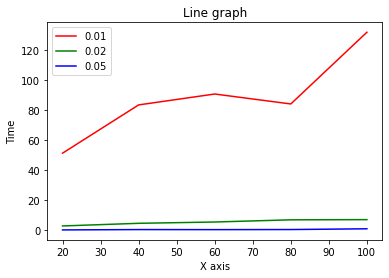

In [44]:
x = np.arange(20, 120, 20)
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Time")
plt.plot(x, durations[0:13:3], color = "red", label = '0.01')
plt.plot(x, durations[1:14:3], color = "green", label = '0.02')
plt.plot(x, durations[2:15:3], color = "blue", label = '0.05')
plt.legend()
plt.show()

In [72]:
c = 0
# For loop to iterate trhough samples list
durations2 = []
for s in samples:  
    print(f'RUNNING {percentages[c]*100}% OF DATASET')
    # For loop to iterate through thresholds list
    for x in thresholds:
        items = {}
        arr = []
        ranges = [0,0.25,0.50,0.75,1]
        chunks = []
        for i in range(len(ranges)-1):
            chunks.append(s[int(ranges[i]*len(s)):int(ranges[i+1]*len(s))])

        threshold = len(s)*x
        start = time.time()

        for chunk in chunks:
            for i in range(len(chunk)):
                for j in range(len(chunk[i])):
                    if chunk[i][j] not in items:
                        items[chunk[i][j]] = 0 
                    items[chunk[i][j]] += 1

        C1 = pd.DataFrame({
                'Itemset': items.keys(),
                'Support': items.values()
            }) 
        L1 = C1.loc[(C1['Support']) >= threshold]

        for chunk in chunks:
            for i in L1['Itemset']:
                for j in L1['Itemset']:
                    if i == j:
                        pass
                    else:
                        for k in chunk:
                            if i in k and j in k and [i,j,0] not in arr and [j,i,0] not in arr:
                                arr.append([i,j,0])

            for i in range(len(arr)):
                for j in chunk:
                    if arr[i][0] in j and arr[i][1] in j:
                        arr[i][2] += 1

        C2 = pd.DataFrame(arr, columns=['Item 1','Item 2','Count'])
        L2 = C2.loc[(C2['Count']) >= threshold]

        end2 = time.time()
        pass_2_time = end2-start
        print(f'\tFINISHED RUNNING THRESHOLD {x} \t{pass_2_time}s')

        end = time.time()
        duration = end-start 
        durations2.append(duration)
    print(f'COMPUTED {percentages[c]*100}% OF DATASET\t{durations2[-1]+durations2[-2]+durations2[-3]}s')

    c+=1
    print('----------------------------------------------------------------------')
print("Durations: \t",durations2)

RUNNING 20.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	64.60356593132019s
	FINISHED RUNNING THRESHOLD 0.02 	6.47997522354126s
	FINISHED RUNNING THRESHOLD 0.05 	0.3270299434661865s
COMPUTED 20.0% OF DATASET	71.41100931167603s
----------------------------------------------------------------------
RUNNING 40.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	171.72325205802917s
	FINISHED RUNNING THRESHOLD 0.02 	11.21128511428833s
	FINISHED RUNNING THRESHOLD 0.05 	0.698328971862793s
COMPUTED 40.0% OF DATASET	183.63452911376953s
----------------------------------------------------------------------
RUNNING 60.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	186.54745817184448s
	FINISHED RUNNING THRESHOLD 0.02 	20.347057104110718s
	FINISHED RUNNING THRESHOLD 0.05 	1.3154659271240234s
COMPUTED 60.0% OF DATASET	208.21047115325928s
----------------------------------------------------------------------
RUNNING 80.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	237.16444492340088s
	FINISHED RUNNI

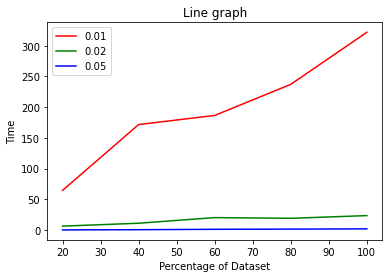

In [73]:
x = np.arange(20, 120, 20)
plt.title("Line graph")
plt.xlabel("Percentage of Dataset")
plt.ylabel("Time")
plt.plot(x, durations2[0:13:3], color = "red", label = '0.01')
plt.plot(x, durations2[1:14:3], color = "green", label = '0.02')
plt.plot(x, durations2[2:15:3], color = "blue", label = '0.05')
plt.legend()
plt.show()